# synpuf disclosure risk

Compare synthetic PUFs trained from a 50% sample, both to the training set and the remaining 50% holdout. Synthetic file (1) is from synthimpute random forests; (2) is from the synthpop R package.

## Setup

### Imports

In [2]:
import pandas as pd
import numpy as np
import synthimpute as si
from scipy import stats

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

### Graphing

In [3]:
# !wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# mpl.font_manager._rebuild()

In [4]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Load data

In [6]:
rf_synth = pd.read_csv('~/Downloads/puf_synth_10p_sample.csv')
synthpop = pd.read_csv('~/Downloads/synthpop_samp.csv')
train = pd.read_csv('~/Downloads/puf_10p_sample_train.csv')
test = pd.read_csv('~/Downloads/puf_10p_sample_test.csv')
nearest_rf = pd.read_csv('~/Downloads/nearest_synpuf7.csv')
nearest_synthpop = pd.read_csv('~/Downloads/nearest_synthpop_samp.csv')

## Examine results

In [7]:
nearest_rf.sort_values('train_dist').head()

,synth_id,train_dist,train_id,test_dist,test_id,dist_diff,dist_ratio
4521,4521,0.0,7499,0.002857,13105,-0.002857,0.0
3041,3041,0.0,9294,0.000013,9039,-0.000013,0.0
13950,13950,0.0,9402,0.003603,5672,-0.003603,0.0
3045,3045,0.0,5156,0.020104,11493,-0.020104,0.0
3047,3047,0.0,5027,0.000643,6209,-0.000643,0.0


In [8]:
nearest_rf.sort_values('dist_diff').head()

,synth_id,train_dist,train_id,test_dist,test_id,dist_diff,dist_ratio
599,599,2.435470,4333,61.696454,12869,-59.260984,0.039475
8415,8415,13.143423,12904,68.764029,6284,-55.620606,0.191138
10766,10766,0.168996,1221,50.582068,14969,-50.413072,0.003341
2844,2844,2.591312,13333,51.535354,15462,-48.944042,0.050282
879,879,2.073917,1221,50.624501,14969,-48.550584,0.040967


In [9]:
nearest_synthpop.sort_values('train_dist').head()

,synth_id,train_dist,train_id,test_dist,test_id,dist_diff,dist_ratio
16375,16377,0.0,1714,0.000257,985,-0.000257,0.0
3347,3347,0.0,7567,0.052568,4356,-0.052568,0.0
3352,3352,0.0,1681,0.000000,2180,0.000000,NaN
930,930,0.0,6410,0.000129,13984,-0.000129,0.0
3358,3358,0.0,3351,0.000000,16038,0.000000,NaN


## Analysis

In [10]:
nearest_rf[['train_dist', 'test_dist', 'dist_diff']].describe()

,train_dist,test_dist,dist_diff
count,16378.000000,16378.000000,16378.000000
mean,1.542847,1.771175,-0.228328
std,4.605536,4.998771,2.087993
min,0.000000,0.000000,-59.260984
25%,0.009059,0.036370,-0.164271
50%,0.298086,0.435945,-0.003278
75%,1.481885,1.763012,0.014282
max,127.233085,126.933672,56.713674


In [11]:
nearest_synthpop[['train_dist', 'test_dist', 'dist_diff']].describe()

,train_dist,test_dist,dist_diff
count,16376.000000,16376.000000,16376.000000
mean,1.562884,1.684306,-0.121422
std,4.001318,4.359407,1.783820
min,0.000000,0.000000,-72.273628
25%,0.016893,0.028561,-0.097639
50%,0.375966,0.427184,-0.000157
75%,1.719346,1.786489,0.027127
max,119.488979,119.484334,48.197855


In [12]:
stats.ttest_1samp(nearest_rf.dist_diff, 0)

Ttest_1sampResult(statistic=-13.994578921507557, pvalue=3.02511083347544e-44)

In [13]:
stats.ttest_1samp(nearest_synthpop.dist_diff, 0)

Ttest_1sampResult(statistic=-8.710611164859056, pvalue=3.306775548890607e-18)

## Charts

### Scatterplots of distance to train and to test

Note we can't use log scales because of the exact zeros.

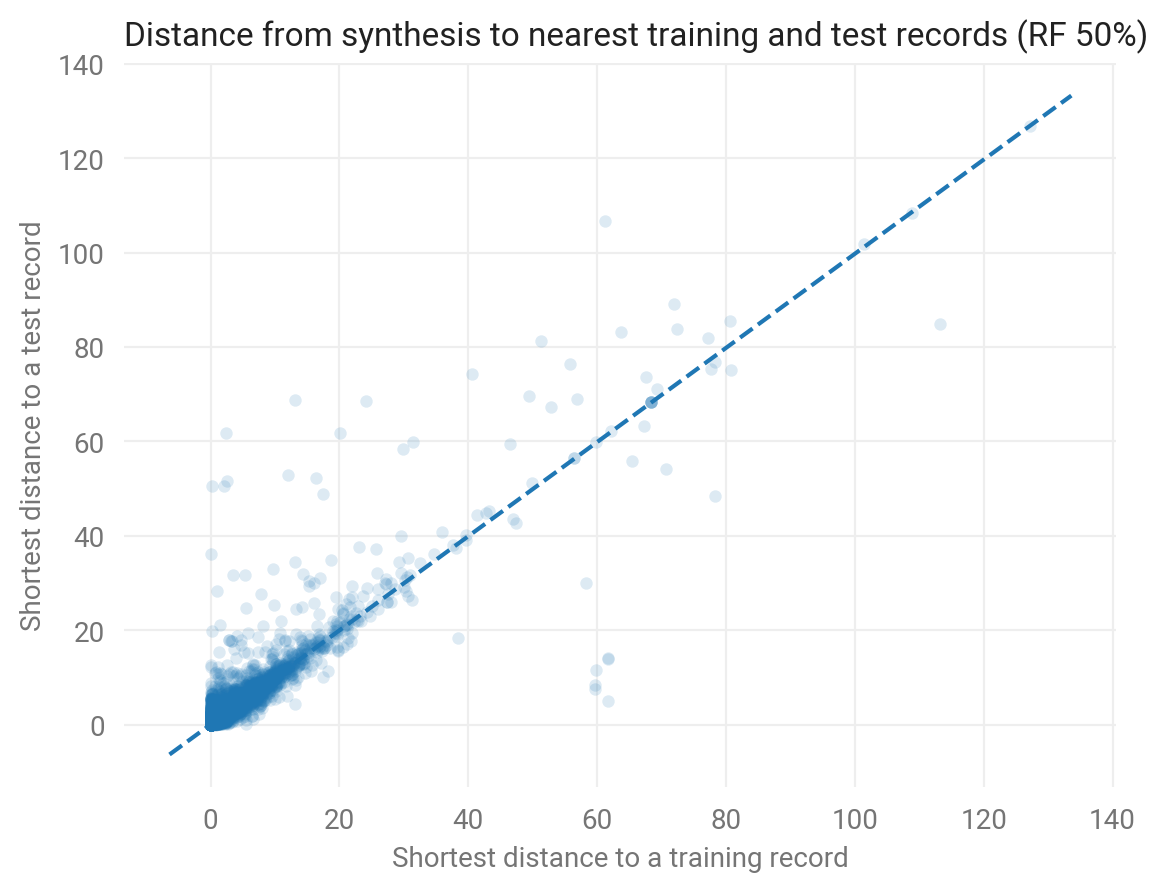

In [14]:
ax = nearest_rf.plot.scatter('train_dist', 'test_dist', alpha=0.15, linewidths=0.0)
# 45-degree line.
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--')
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Shortest distance to a training record',
       ylabel='Shortest distance to a test record')
plt.title('Distance from synthesis to nearest training and test records (RF 50%)',
          loc='left')
plt.show()

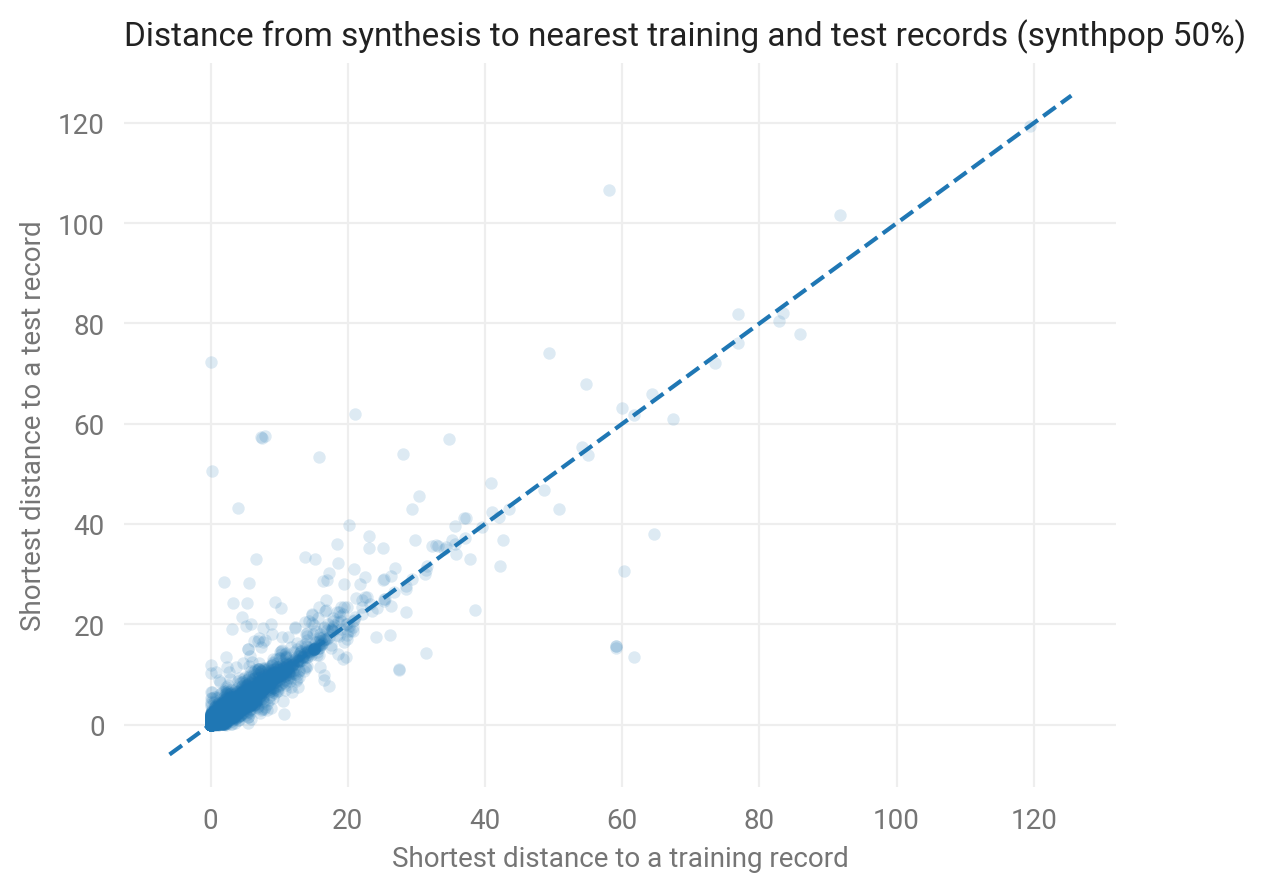

In [15]:
ax = nearest_synthpop.plot.scatter('train_dist', 'test_dist', alpha=0.15, linewidths=0.0)
# 45-degree line.
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--')
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Shortest distance to a training record',
       ylabel='Shortest distance to a test record')
plt.title('Distance from synthesis to nearest training and test records (synthpop 50%)',
          loc='left')
plt.show()

### Boxplot of distances

In [16]:
distances_stacked = pd.DataFrame({
    'type': 'train',
    'model': 'RF',
    'dist': nearest_rf.train_dist
}).append(pd.DataFrame({
    'type': 'test',
    'model': 'RF',
    'dist': nearest_rf.test_dist
})).append(pd.DataFrame({
    'type': 'train',
    'model': 'synthpop',
    'dist': nearest_synthpop.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': 'synthpop',
    'dist': nearest_synthpop.test_dist
}))

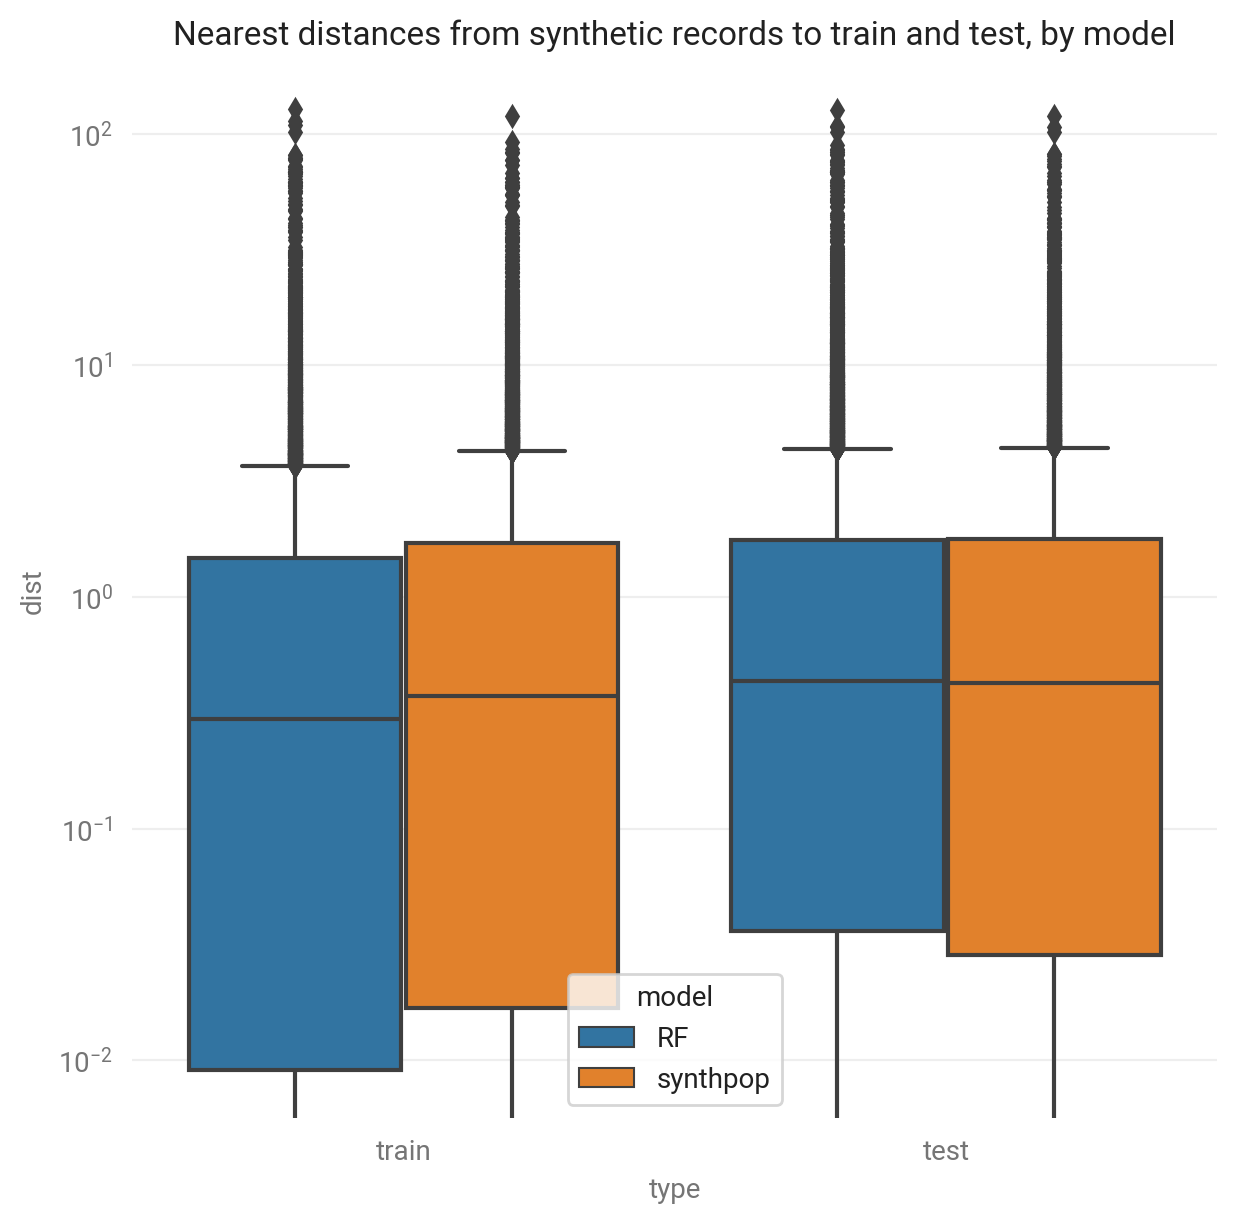

In [17]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='type', y='dist',
            hue='model', data=distances_stacked)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.title('Nearest distances from synthetic records to train and test, by model')
plt.show()

### CDFs of distances

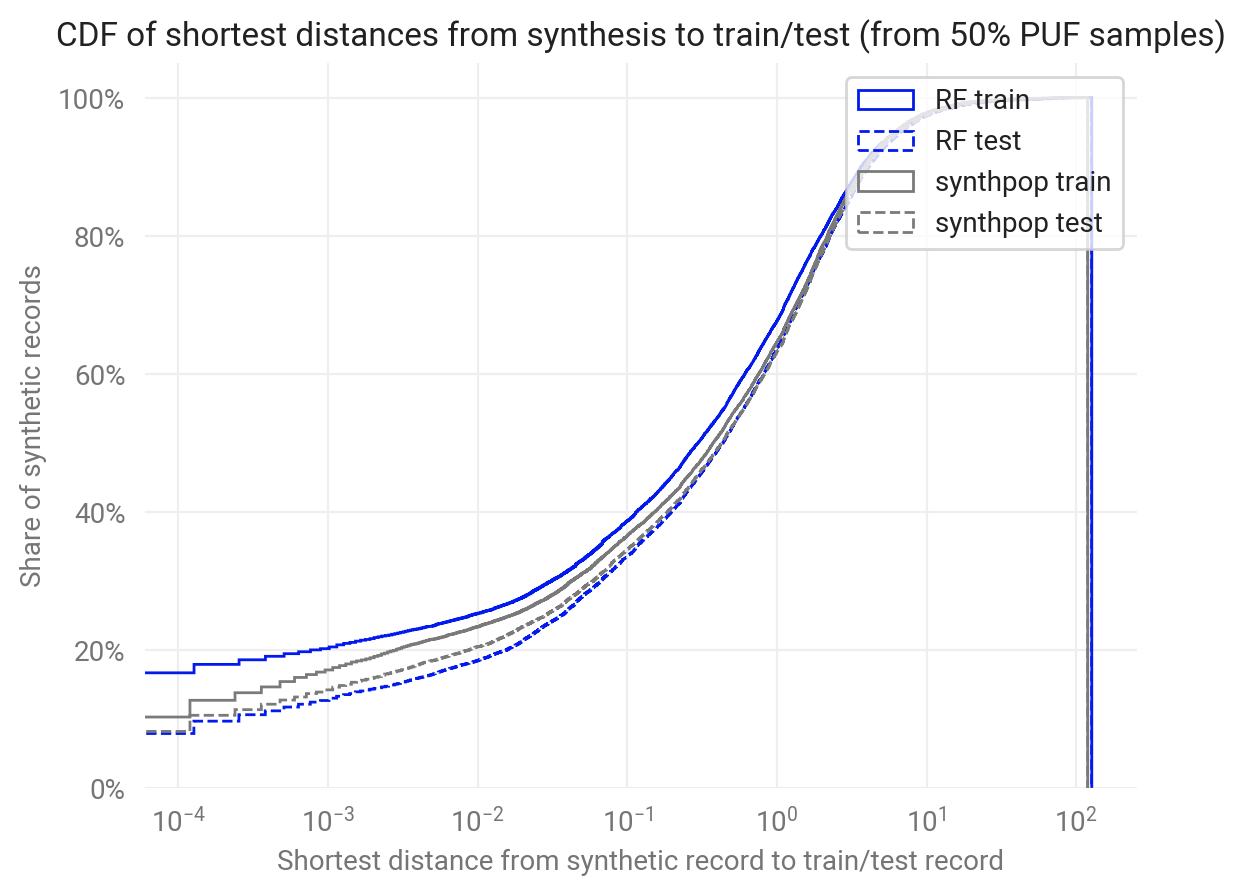

In [18]:
# Plot the four series.
BINS = 1000000
ax = nearest_rf.train_dist.hist(cumulative=True, density=1, bins=BINS, color='#021aee', histtype='step')
nearest_rf.test_dist.hist(cumulative=True, density=1, bins=BINS, histtype='step', color='#021aee', ls='--')
nearest_synthpop.train_dist.hist(cumulative=True, density=1, bins=BINS, histtype='step', color='#7a7a7a')
nearest_synthpop.test_dist.hist(cumulative=True, density=1, bins=BINS, histtype='step', color='#7a7a7a', ls='--')
# Formatting.
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
ax.grid(color='#eeeeee')
sns.despine(left=True, bottom=True)
plt.xscale('log')
plt.legend(['RF train', 'RF test', 'synthpop train', 'synthpop test'])
ax.set(xlabel='Shortest distance from synthetic record to train/test record',
       ylabel='Share of synthetic records')
plt.title('CDF of shortest distances from synthesis to train/test (from 50% PUF samples)')
plt.show()

### Exact matches

In [19]:
exact_matches = pd.DataFrame({
    'type': ['train', 'train', 'test', 'test'],
    'model': ['RF', 'synthpop', 'RF', 'synthpop'],
    'share_exact': [(nearest_rf.train_dist == 0).mean(),
                    (nearest_synthpop.train_dist == 0).mean(),
                    (nearest_rf.test_dist == 0).mean(),
                    (nearest_synthpop.test_dist == 0).mean()]})
exact_matches

,type,model,share_exact
0,train,RF,0.135487
1,train,synthpop,0.077247
2,test,RF,0.037550
3,test,synthpop,0.047875


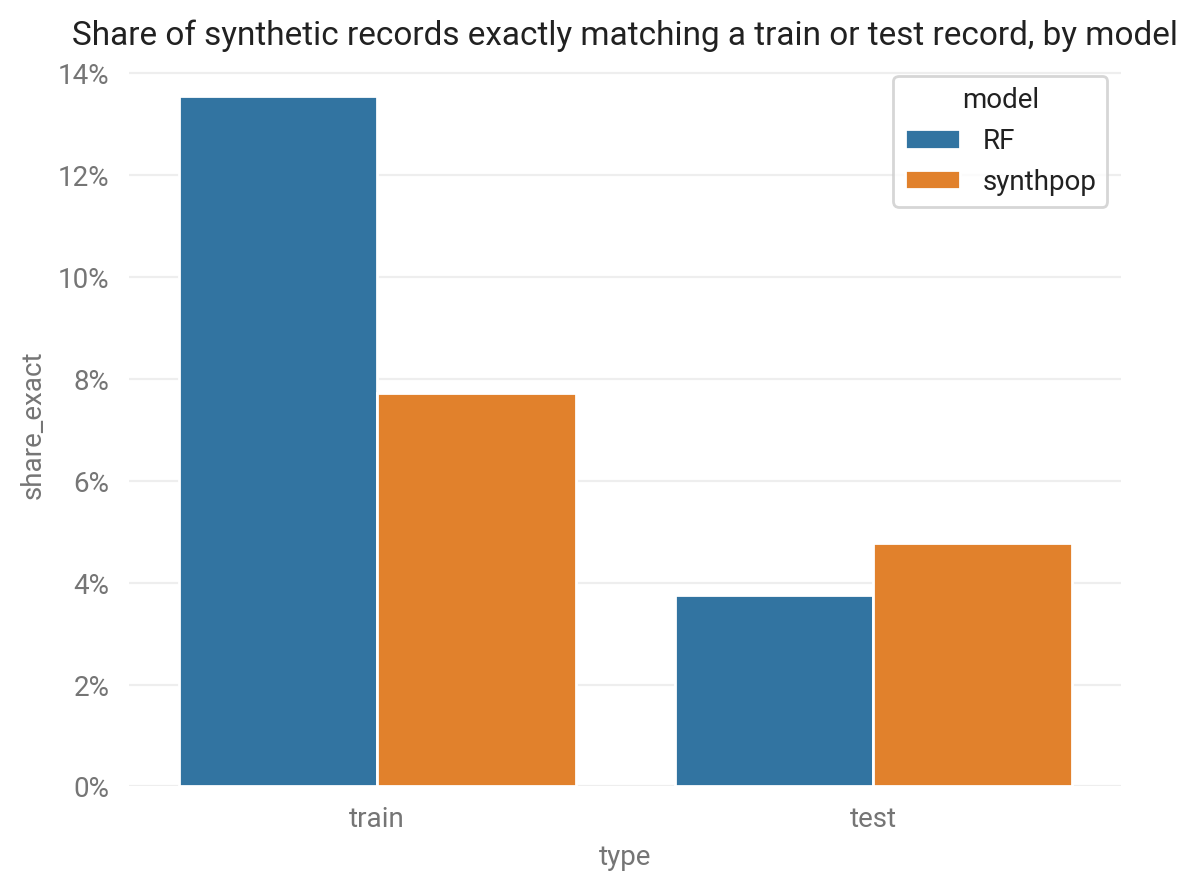

In [20]:
ax = sns.barplot(x='type', y='share_exact', hue='model', data=exact_matches)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
plt.title('Share of synthetic records exactly matching a train or test record, by model')
plt.show()

In [21]:
exact_matches_bool = pd.DataFrame({
    'type': 'train',
    'model': 'RF',
    'share_exact': (nearest_rf.train_dist == 0)
}).append(pd.DataFrame({
    'type': 'test',
    'model': 'RF',
    'share_exact': (nearest_rf.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': 'synthpop',
    'share_exact': (nearest_synthpop.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': 'synthpop',
    'share_exact': (nearest_synthpop.test_dist == 0)
}))

/home/maxghenis/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


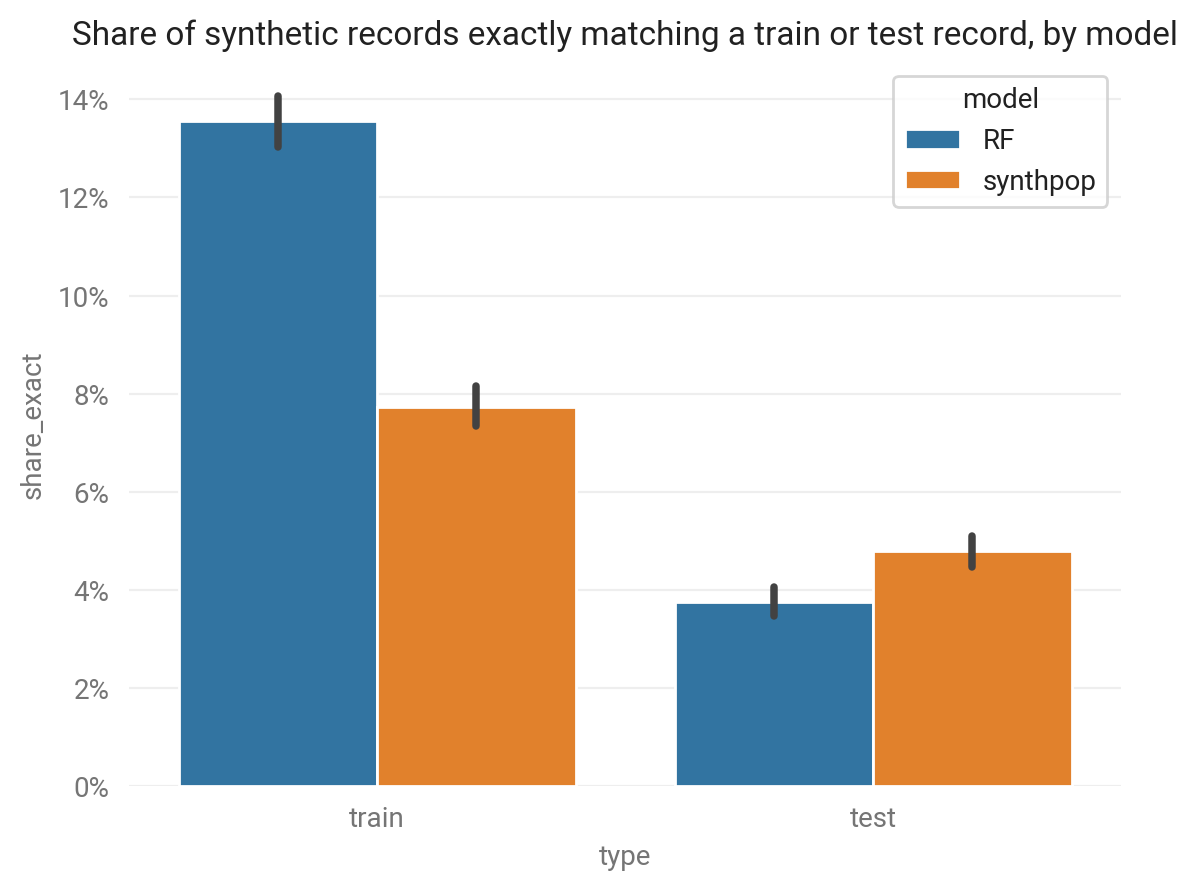

In [22]:
ax = sns.barplot(x='type', y='share_exact', hue='model', data=exact_matches_bool)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
plt.title('Share of synthetic records exactly matching a train or test record, by model')
plt.show()

What share of exact matches to train also exactly matched a test?

In [23]:
def share_exact_matches(df):
    exact_train = df[df.train_dist == 0]
    return((exact_train.test_dist == 0).sum() / exact_train.shape[0])

share_exact_matches(nearest_rf)

0.24921135646687698

In [24]:
share_exact_matches(nearest_synthpop)

0.5019762845849802